<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/Feature_Importance_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')
#df = df[df['n/m']==2]

print(df.shape[0])

shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus']
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']

8750


In [2]:
X_modified = X.drop(['indeks','range', 'subtype'], axis=1)
print(X_modified.head())
#X_modified = X.drop(['max', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', '(m/n)^2', '(m/n)^3', 'class', 'av.length'], axis = 1)

   class    n   m   n/m  (n/m)^2     (n/m)^3       m/n   (m/n)^2   (m/n)^3  \
0      4   40  10  4.00  16.0000   64.000000  0.250000  0.062500  0.015625   
1      5   22   8  2.75   7.5625   20.796875  0.363636  0.132231  0.048084   
2      6  162  18  9.00  81.0000  729.000000  0.111111  0.012346  0.001372   
3      6  180  72  2.50   6.2500   15.625000  0.400000  0.160000  0.064000   
4      6  162  54  3.00   9.0000   27.000000  0.333333  0.111111  0.037037   

    av.length     std.dev  median  min  max    k  
0   94.525002   22.764103    96.0   47  141   32  
1   81.045456   58.938614    77.5    2  198   22  
2  393.987640  145.532776   379.0  163  643  140  
3  457.755554  152.218231   471.5  181  718  160  
4  398.388885  137.701538   396.0  163  644  140  


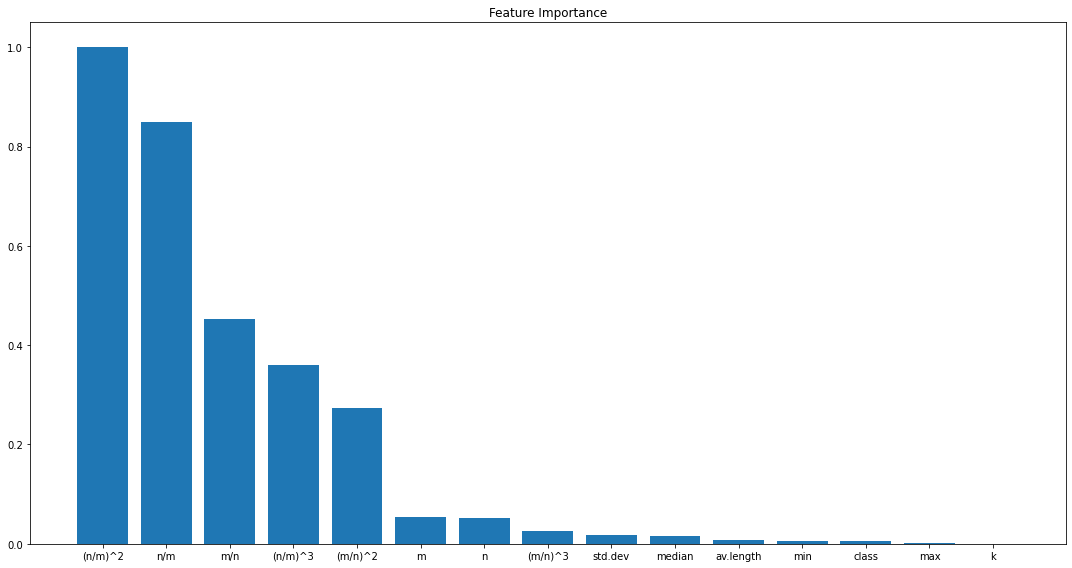

In [3]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

#X_train, X_test, y_train, y_test = train_test_split(X_modified, y, random_state=0, train_size = 0.83)

#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

X_copy = X_modified
X_modified = sc.fit_transform(X_modified)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_modified, y)

importances = model.coef_
importances = abs(importances)

importances = (importances-np.min(importances))/np.ptp(importances)

sorted_indices = np.argsort(importances)[::-1]
feat_labels = X_copy.columns[1:]



plt.figure(figsize=(15, 8))
plt.title('Feature Importance')
plt.bar(range(X_copy.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_copy.shape[1]), X_copy.columns[sorted_indices])
plt.tight_layout()
plt.show()
